In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

DataFrame = pd.read_csv("C:/Users/Lenovo/OneDrive/Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
DataFrame.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
DataFrame=DataFrame.drop("customerID",axis=1)

In [4]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
DataFrame.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
DataFrame.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
DataFrame['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

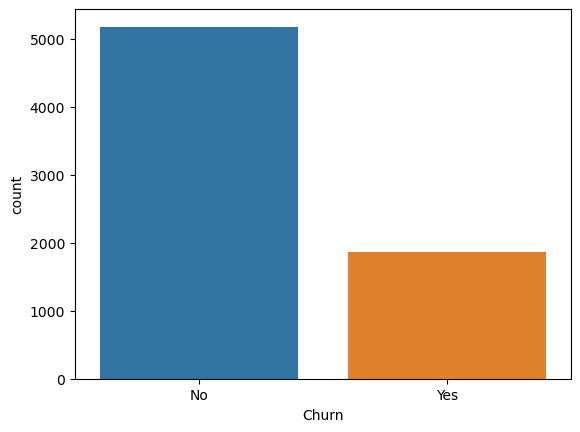

In [8]:
sns.countplot(x="Churn",data=DataFrame)
plt.show()

In [9]:
label_encoder = LabelEncoder()
categorical_columns = DataFrame.select_dtypes(include=['object']).columns
for column in categorical_columns:
    DataFrame[column] = label_encoder.fit_transform(DataFrame[column])
DataFrame.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


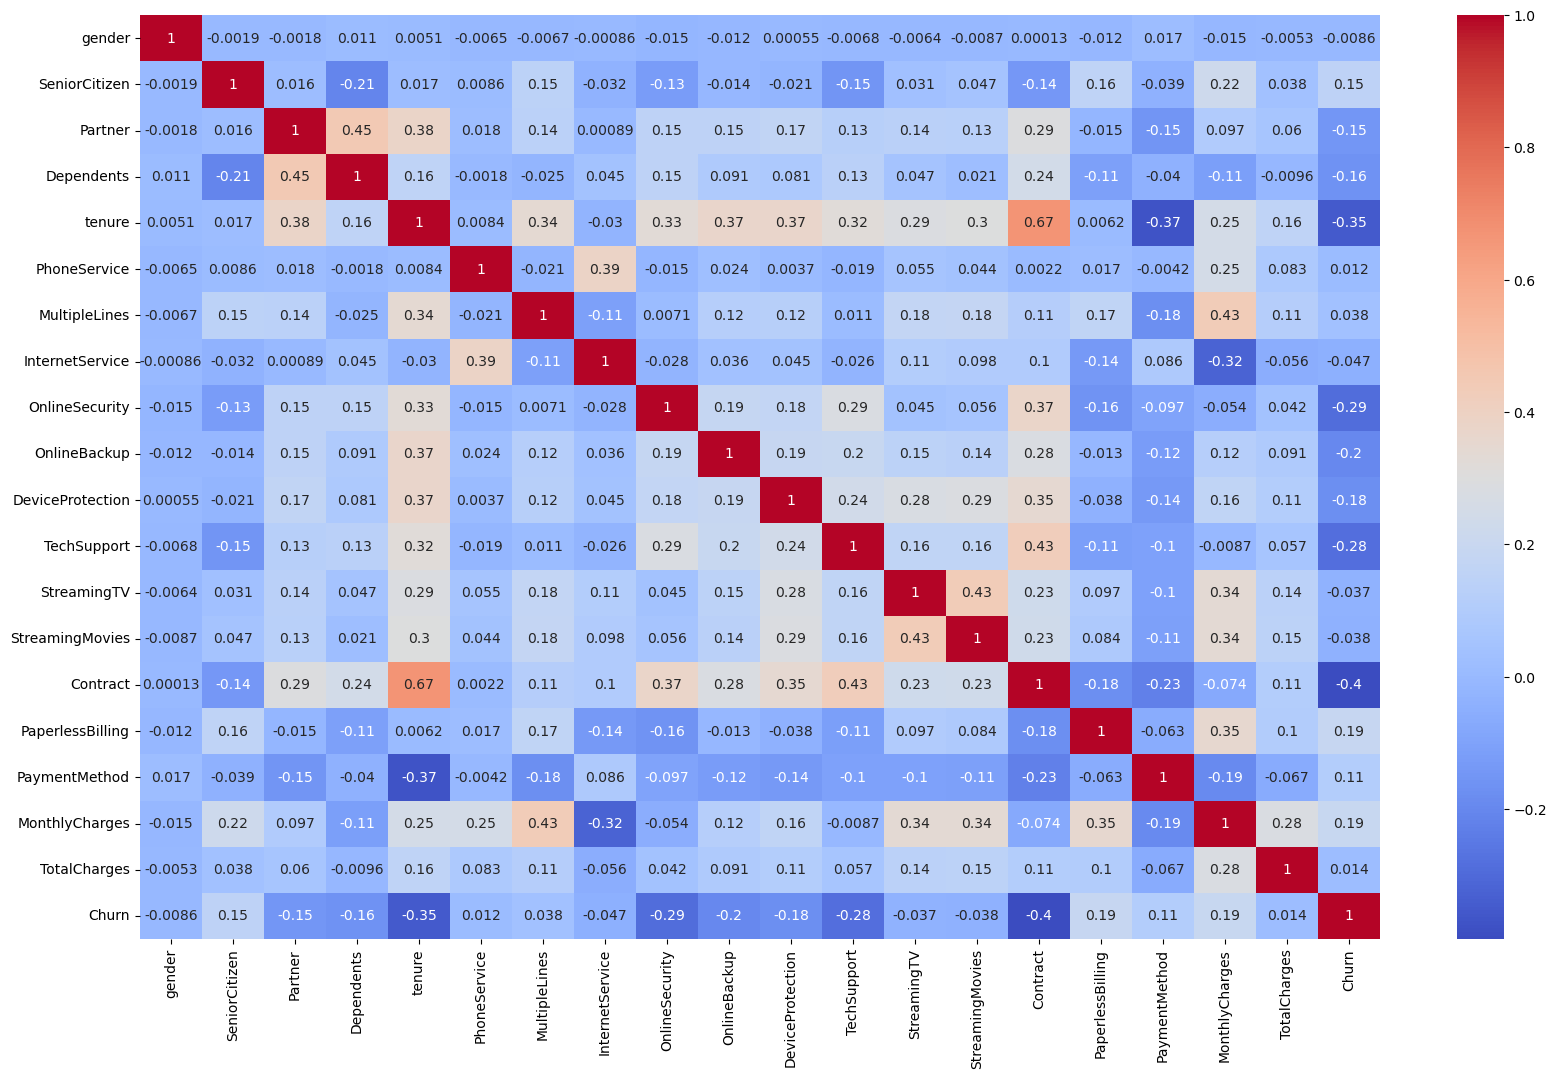

In [10]:
# Plot the heatmap of correlations
plt.figure(figsize=(20, 12))
sns.heatmap(data=DataFrame.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
x=DataFrame.drop(["gender","PhoneService","MultipleLines","InternetService","StreamingTV","StreamingMovies","TotalCharges","Churn"],axis=1)
y=DataFrame["Churn"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
print(x.shape)
print(y.shape)

(7043, 12)
(7043,)


In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=50)

Max Accuracy: 0.7885024840312278 for k = 92


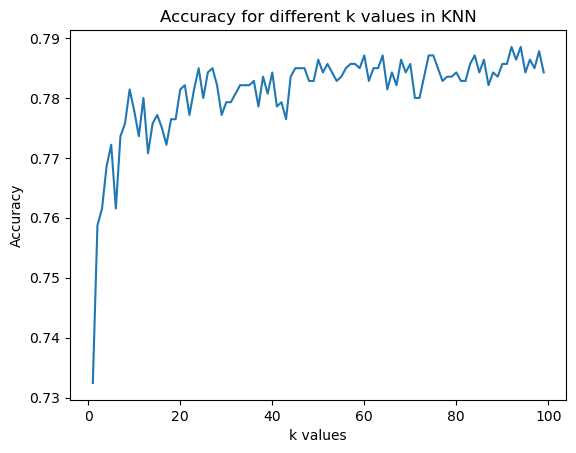

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
d = {}
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    test_pred = knn.predict(xtest)
    ac = accuracy_score(test_pred, ytest)
    d[i] = ac
best_k = max(d, key=d.get)
max_accuracy = d[best_k]
print("Max Accuracy:",max_accuracy, "for k =", best_k)

# Plotting the values
plt.plot(list(d.keys()), list(d.values()))
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k values in KNN')
plt.show()

In [15]:
knn= KNeighborsClassifier(n_neighbors=93)
knn.fit(xtrain,ytrain)
train1=knn.predict(xtrain)
print(accuracy_score(train1,ytrain)*100,"%")
a1=accuracy_score(train1,ytrain)

78.57649982250621 %


In [16]:
test1=knn.predict(xtest)
print(accuracy_score(test1,ytest)*100,"%")
te1=accuracy_score(test1,ytest)
print(classification_report(test1,ytest))


78.63733144073811 %
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1080
           1       0.54      0.60      0.57       329

    accuracy                           0.79      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.80      0.79      0.79      1409



In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
train2=lr.predict(xtrain)
print(accuracy_score(train2,ytrain)*100,"%")
a2=accuracy_score(train2,ytrain)

79.74795882144124 %


In [18]:
test2=lr.predict(xtest)
print(accuracy_score(test2,ytest)*100,"%")
print(classification_report(test2,ytest))
te2=accuracy_score(test2,ytest)

80.19872249822569 %
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1092
           1       0.55      0.64      0.59       317

    accuracy                           0.80      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.81      0.80      0.81      1409



In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(xtrain, ytrain)
train3=dt.predict(xtrain)
print(accuracy_score(train3,ytrain)*100,"%")
a3=accuracy_score(train3,ytrain)


86.72346467873624 %


In [20]:
test3=lr.predict(xtest)
te3= accuracy_score(test3,ytest)
print(accuracy_score(test3,ytest)*100,"%")
print(classification_report(test3,ytest))

80.19872249822569 %
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1092
           1       0.55      0.64      0.59       317

    accuracy                           0.80      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.81      0.80      0.81      1409



In [21]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(xtrain, ytrain)
train4 = svm.predict(xtrain)
print(accuracy_score(train4,ytrain)*100,"%")
a4=accuracy_score(train4,ytrain)

80.54668086616968 %


In [22]:
test4 = svm.predict(xtest)
te4=accuracy_score(test4,ytest)
print(accuracy_score(test4,ytest)*100,"%")
print(classification_report(test4,ytest))

78.63733144073811 %
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1144
           1       0.45      0.63      0.52       265

    accuracy                           0.79      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.82      0.79      0.80      1409



In [25]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(xtrain, ytrain)
train5=model.predict(xtrain)
a5=accuracy_score(train5,ytrain)
test5= model.predict(xtest)
te5 = accuracy_score(ytest, test5)
print("Accuracy:", te5)
print(classification_report(ytest, test5))


Accuracy: 0.7977288857345636
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [26]:
c={"Model":["KNN","Logistic Regression","DecisionTreeClassifier",'SVC',"Gradient Boosting"],'Training Accuracy':[a1,a2,a3,a4,a5],'Testing Accuracy':[te1,te2,te3,te4,te5]}
c=pd.DataFrame(c)
c

,Model,Training Accuracy,Testing Accuracy
0,KNN,0.785765,0.786373
1,Logistic Regression,0.797480,0.801987
2,DecisionTreeClassifier,0.867235,0.801987
3,SVC,0.805467,0.786373
4,Gradient Boosting,0.820199,0.797729
